In [1]:
# ============================================
#     HEART DISEASE PREDICTION PROJECT
# ============================================

# ============================================
#           IMPORTING LIBRARIES
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# For saving models
import pickle

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print(" All libraries imported successfully!")


 All libraries imported successfully!


In [2]:
# ============================================
#          LOADING THE DATASET
# ============================================

# Load the dataset
df = pd.read_csv('cardio_train.csv', sep=';')

print("Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")


Dataset loaded successfully!
Dataset Shape: (70000, 13)
Total Records: 70000
Total Features: 13


In [3]:
# ============================================
#      EXPLORATORY DATA ANALYSIS (EDA)
# ============================================

print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Display first few rows
print("\n First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\n Dataset Information:")
print(df.info())

# Display statistical summary
print("\n Statistical Summary:")
print(df.describe())

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print(f"\n Number of duplicate rows: {df.duplicated().sum()}")

# Check target variable distribution
print("\n Target Variable Distribution:")
print(df['cardio'].value_counts())
print("\nPercentage:")
print(df['cardio'].value_counts(normalize=True) * 100)


EXPLORATORY DATA ANALYSIS

 First 5 rows of the dataset:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   g

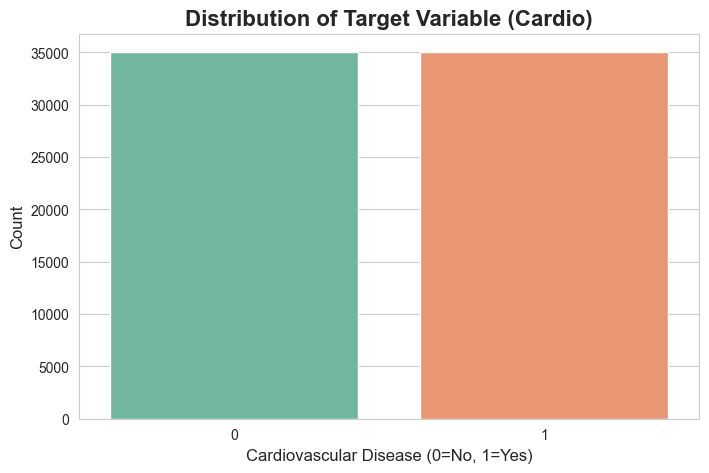

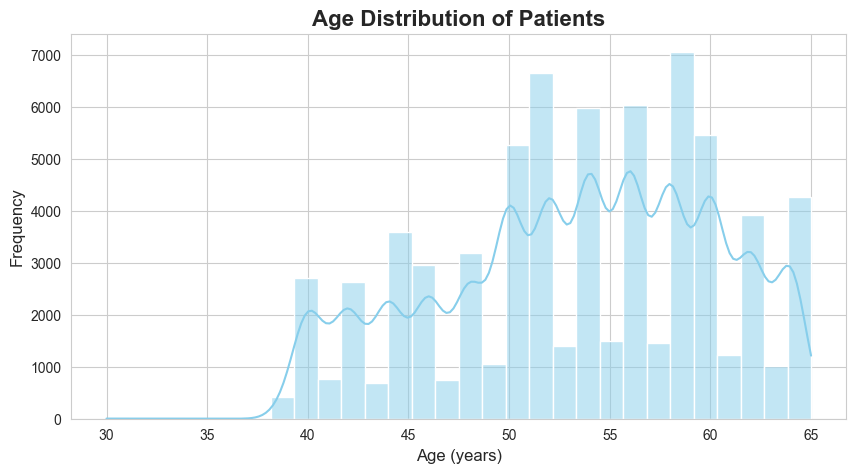

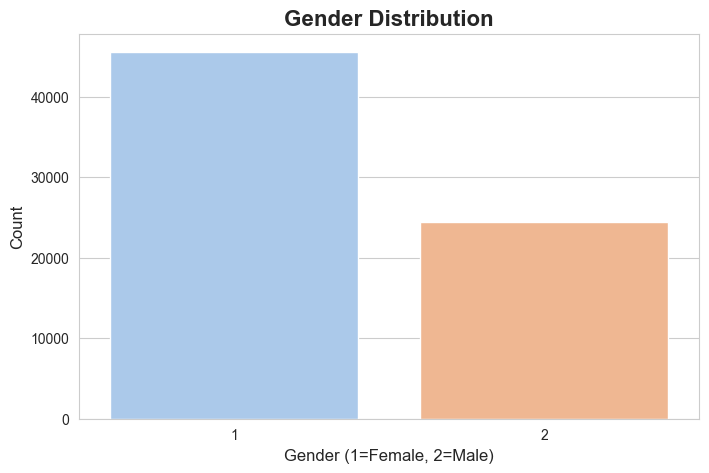

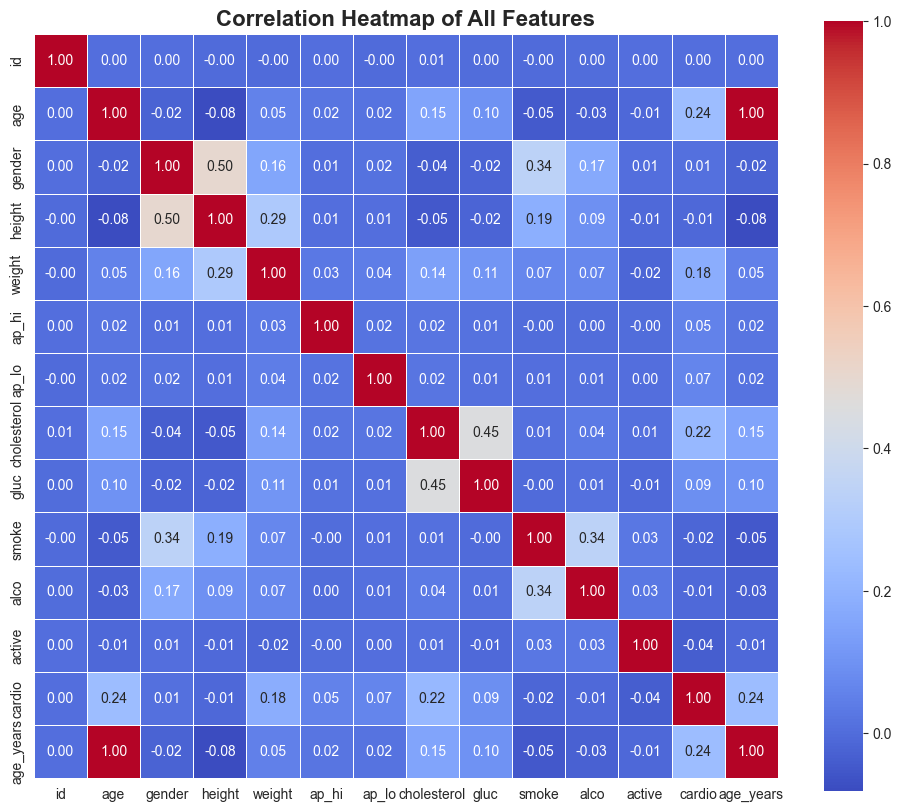

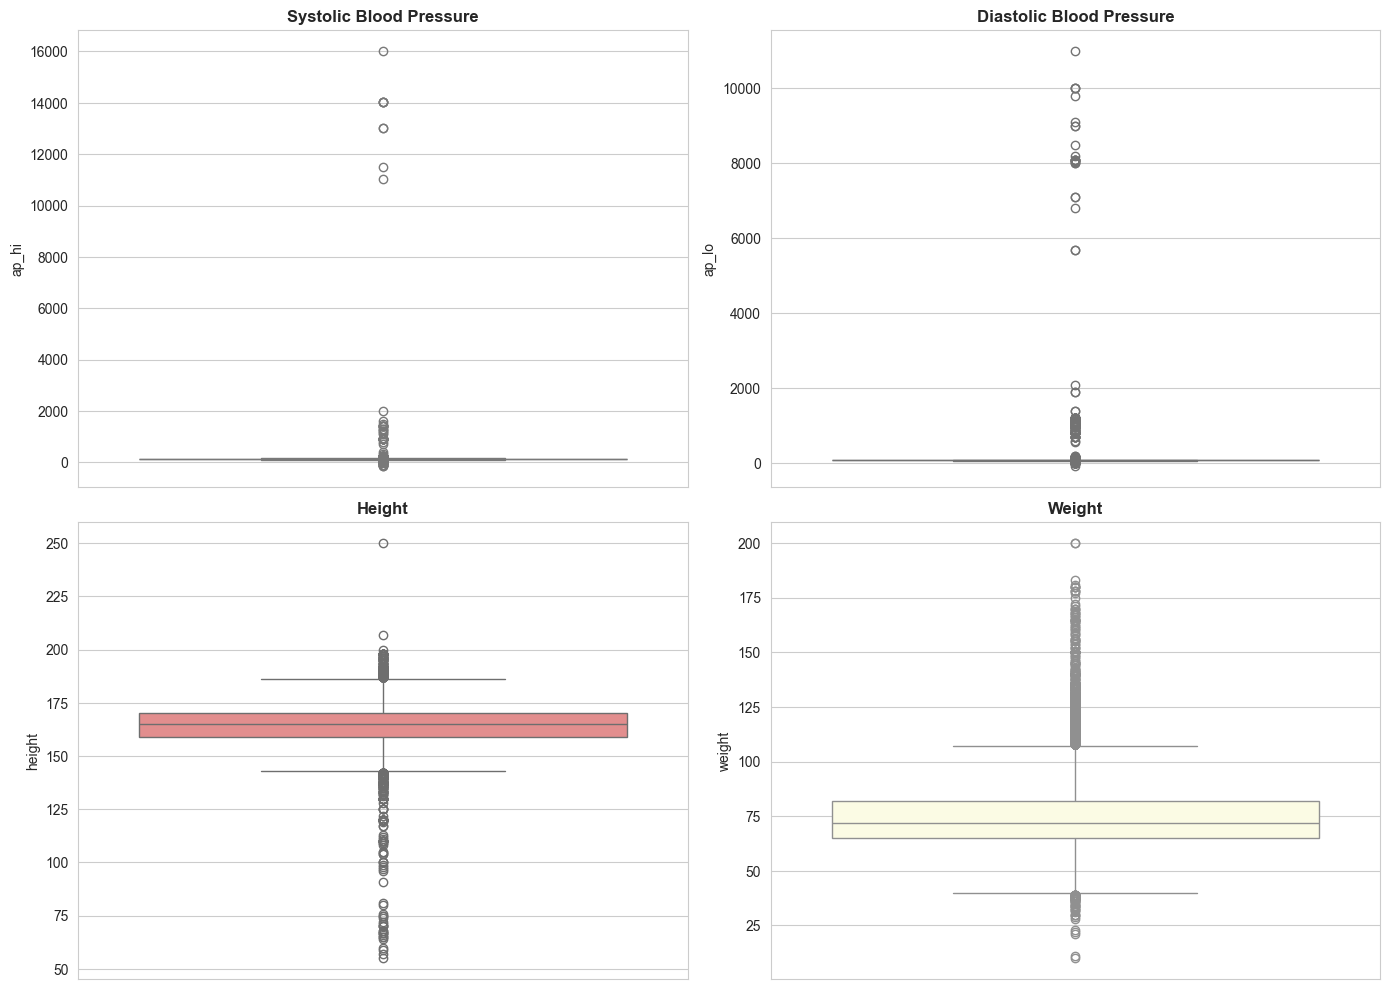

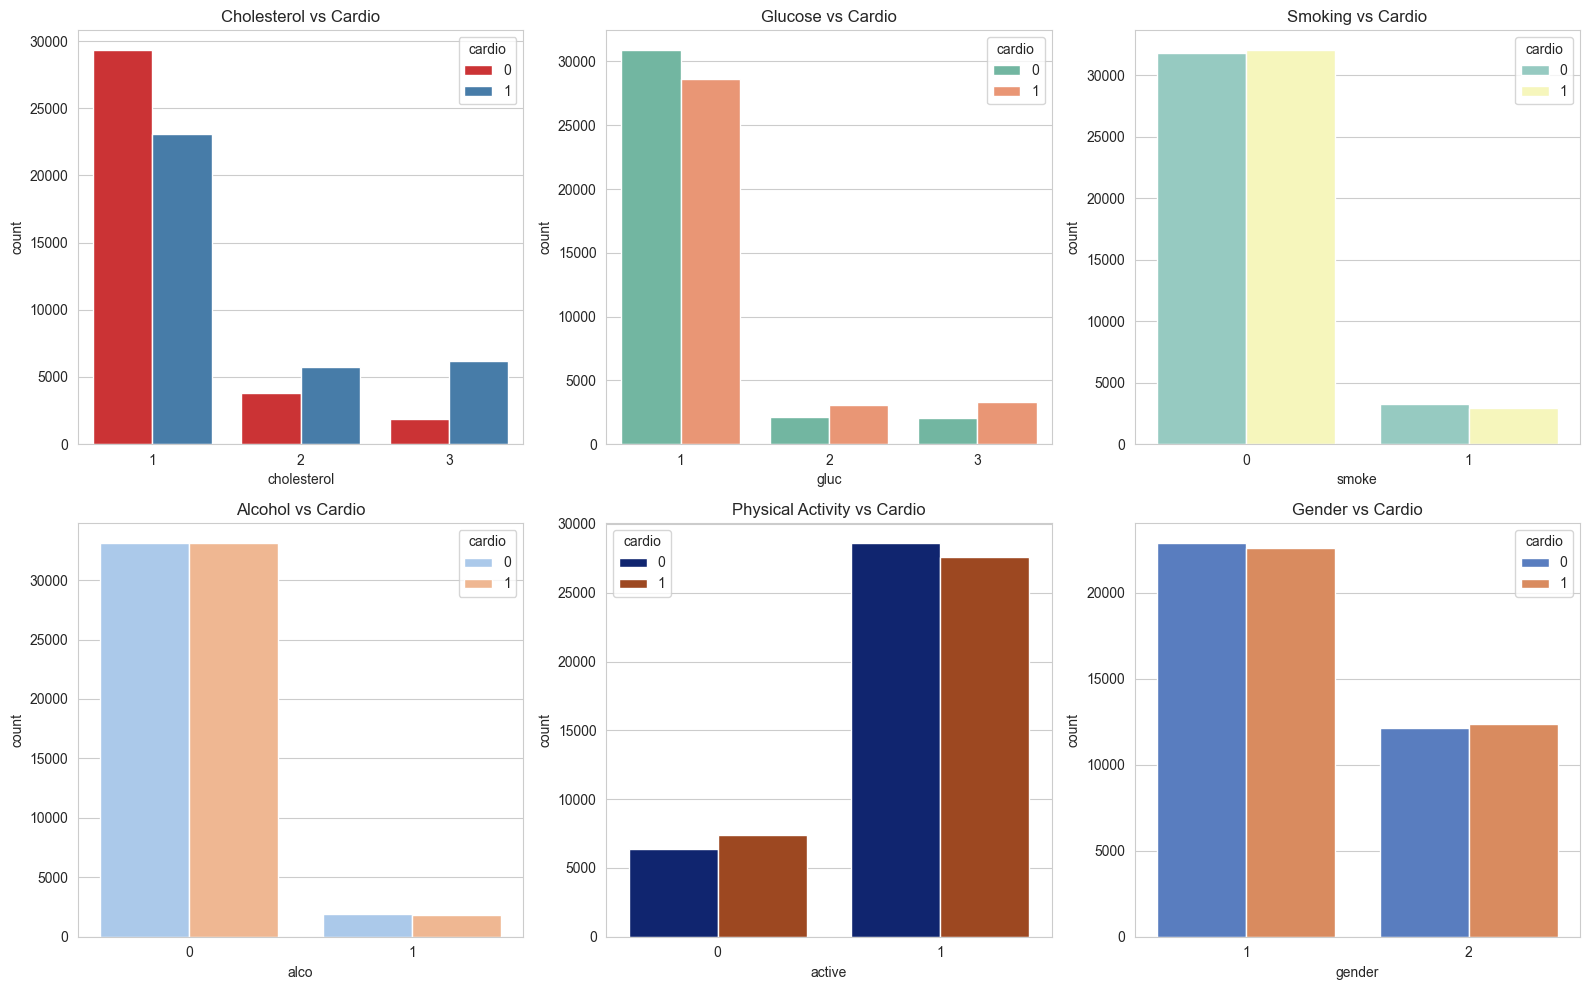

 All visualizations created and saved!


In [4]:
# ============================================
#            DATA VISUALIZATION
# ============================================

# 4.1: Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='cardio', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Cardio)', fontsize=16, fontweight='bold')
plt.xlabel('Cardiovascular Disease (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('../visualizations/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.2: Age Distribution
df['age_years'] = (df['age'] / 365).round().astype('int')
plt.figure(figsize=(10, 5))
sns.histplot(df['age_years'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Patients', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('../visualizations/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.3: Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Gender (1=Female, 2=Male)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('../visualizations/gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.4: Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of All Features', fontsize=16, fontweight='bold')
plt.savefig('../visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.5: Box plots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(y=df['ap_hi'], ax=axes[0, 0], color='lightblue')
axes[0, 0].set_title('Systolic Blood Pressure', fontweight='bold')

sns.boxplot(y=df['ap_lo'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Diastolic Blood Pressure', fontweight='bold')

sns.boxplot(y=df['height'], ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Height', fontweight='bold')

sns.boxplot(y=df['weight'], ax=axes[1, 1], color='lightyellow')
axes[1, 1].set_title('Weight', fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.6: Cardio vs Various Features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

sns.countplot(x='cholesterol', hue='cardio', data=df, ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Cholesterol vs Cardio')

sns.countplot(x='gluc', hue='cardio', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Glucose vs Cardio')

sns.countplot(x='smoke', hue='cardio', data=df, ax=axes[0, 2], palette='Set3')
axes[0, 2].set_title('Smoking vs Cardio')

sns.countplot(x='alco', hue='cardio', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Alcohol vs Cardio')

sns.countplot(x='active', hue='cardio', data=df, ax=axes[1, 1], palette='dark')
axes[1, 1].set_title('Physical Activity vs Cardio')

sns.countplot(x='gender', hue='cardio', data=df, ax=axes[1, 2], palette='muted')
axes[1, 2].set_title('Gender vs Cardio')

plt.tight_layout()
plt.savefig('../visualizations/features_vs_cardio.png', dpi=300, bbox_inches='tight')
plt.show()

print(" All visualizations created and saved!")


In [5]:
# ============================================
#               DATA CLEANING
# ============================================

print("="*50)
print("DATA CLEANING")
print("="*50)

# Create a copy for cleaning
df_cleaned = df.copy()

print(f"\n Original Dataset Shape: {df_cleaned.shape}")

# 5.1: Remove duplicate rows
duplicates_before = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
print(f" Removed {duplicates_before} duplicate rows")
print(f" Shape after removing duplicates: {df_cleaned.shape}")

# 5.2: Remove outliers based on domain knowledge
print("\n Removing outliers based on medical constraints...")

# Blood pressure outliers (medically impossible values)
df_cleaned = df_cleaned[(df_cleaned['ap_hi'] >= 80) & (df_cleaned['ap_hi'] <= 200)]
df_cleaned = df_cleaned[(df_cleaned['ap_lo'] >= 60) & (df_cleaned['ap_lo'] <= 140)]
df_cleaned = df_cleaned[df_cleaned['ap_hi'] > df_cleaned['ap_lo']]  # Systolic > Diastolic

# Height outliers (reasonable human height range in cm)
df_cleaned = df_cleaned[(df_cleaned['height'] >= 140) & (df_cleaned['height'] <= 210)]

# Weight outliers (reasonable human weight range in kg)
df_cleaned = df_cleaned[(df_cleaned['weight'] >= 40) & (df_cleaned['weight'] <= 200)]

print(f" Outliers removed")
print(f" Final cleaned dataset shape: {df_cleaned.shape}")
print(f" Total records removed: {df.shape[0] - df_cleaned.shape[0]}")

# 5.3: Handle missing values (if any)
missing_values = df_cleaned.isnull().sum()
if missing_values.sum() > 0:
    print("\n Handling missing values...")
    # Fill numerical columns with median
    numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
    df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())
    print(" Missing values handled")
else:
    print("\n No missing values found!")

print(f"\n Data cleaning completed!")
print(f"Final dataset shape: {df_cleaned.shape}")


DATA CLEANING

 Original Dataset Shape: (70000, 14)
 Removed 0 duplicate rows
 Shape after removing duplicates: (70000, 14)

 Removing outliers based on medical constraints...
 Outliers removed
 Final cleaned dataset shape: (68310, 14)
 Total records removed: 1690

 No missing values found!

 Data cleaning completed!
Final dataset shape: (68310, 14)


In [6]:
# ============================================
#          FEATURE ENGINEERING
# ============================================

print("="*50)
print("FEATURE ENGINEERING")
print("="*50)

# 6.1: Create new features
# Convert age from days to years
df_cleaned['age_years'] = (df_cleaned['age'] / 365).round().astype('int')

# Create BMI (Body Mass Index)
df_cleaned['bmi'] = df_cleaned['weight'] / ((df_cleaned['height'] / 100) ** 2)

# Create age groups
df_cleaned['age_group'] = pd.cut(df_cleaned['age_years'], 
                                  bins=[0, 40, 50, 60, 100],
                                  labels=['<40', '40-50', '50-60', '>60'])

# Mean arterial pressure (MAP)
df_cleaned['map'] = ((2 * df_cleaned['ap_lo']) + df_cleaned['ap_hi']) / 3

# Pulse pressure
df_cleaned['pulse_pressure'] = df_cleaned['ap_hi'] - df_cleaned['ap_lo']

print(" New features created:")
print("   - age_years")
print("   - bmi")
print("   - age_group")
print("   - map (Mean Arterial Pressure)")
print("   - pulse_pressure")

# Display summary of new features
print("\n BMI Statistics:")
print(df_cleaned['bmi'].describe())


FEATURE ENGINEERING
 New features created:
   - age_years
   - bmi
   - age_group
   - map (Mean Arterial Pressure)
   - pulse_pressure

 BMI Statistics:
count    68310.000000
mean        27.441772
std          5.179706
min         13.520822
25%         23.875115
50%         26.346494
75%         30.116213
max         68.308315
Name: bmi, dtype: float64


In [7]:
# ============================================
#            DATA PREPROCESSING
# ============================================

print("="*50)
print("DATA PREPROCESSING")
print("="*50)

# 7.1: Select features for modeling
# Drop unnecessary columns
features_to_drop = ['id', 'age', 'age_group']  # age converted to age_years
df_model = df_cleaned.drop(columns=features_to_drop, errors='ignore')

# Separate features and target
X = df_model.drop('cardio', axis=1)
y = df_model['cardio']

print(f"\n Features shape: {X.shape}")
print(f" Target shape: {y.shape}")
print(f"\n Features used for modeling:")
print(X.columns.tolist())

# 7.2: Data Encoding (if needed)
# This dataset is already encoded, but demonstrating the concept
print("\n Data Encoding:")
print(" All features are already numerical - no encoding needed")
print("   (gender, cholesterol, gluc, smoke, alco, active are already binary/categorical)")

# 7.3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n Training set size: {X_train.shape[0]} samples")
print(f" Testing set size: {X_test.shape[0]} samples")
print(f" Train-Test Split: 80-20")

# 7.4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Feature Scaling completed using StandardScaler")
print(f"   Mean: {scaler.mean_[:3]}... (showing first 3)")
print(f"   Std: {scaler.scale_[:3]}... (showing first 3)")

# Save the scaler for future use
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("\n Scaler saved to '../models/scaler.pkl'")


DATA PREPROCESSING

 Features shape: (68310, 14)
 Target shape: (68310,)

 Features used for modeling:
['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'map', 'pulse_pressure']

 Data Encoding:
 All features are already numerical - no encoding needed
   (gender, cholesterol, gluc, smoke, alco, active are already binary/categorical)

 Training set size: 54648 samples
 Testing set size: 13662 samples
 Train-Test Split: 80-20

 Feature Scaling completed using StandardScaler
   Mean: [  1.34747841 164.44550578  74.16030504]... (showing first 3)
   Std: [ 0.47616926  7.79188254 14.27837406]... (showing first 3)

 Scaler saved to '../models/scaler.pkl'


In [8]:
# ============================================
#             MODEL TRAINING
# ============================================

print("="*50)
print("MODEL TRAINING")
print("="*50)

# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train each model
print("\n Training models...\n")
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f" {name} - Accuracy: {accuracy:.4f}")

print("\n All models trained successfully!")


MODEL TRAINING

 Training models...

Training Logistic Regression...
 Logistic Regression - Accuracy: 0.7299
Training Decision Tree...
 Decision Tree - Accuracy: 0.6350
Training Random Forest...
 Random Forest - Accuracy: 0.7092
Training SVM...
 SVM - Accuracy: 0.7347
Training KNN...
 KNN - Accuracy: 0.6973
Training Naive Bayes...
 Naive Bayes - Accuracy: 0.7219
Training Gradient Boosting...
 Gradient Boosting - Accuracy: 0.7374

 All models trained successfully!


MODEL EVALUATION

 Model Performance Comparison:
              Model  Accuracy  Precision   Recall  F1-Score
  Gradient Boosting  0.737447   0.754738 0.695221  0.723758
                SVM  0.734739   0.765543 0.668590  0.713789
Logistic Regression  0.729908   0.753260 0.675248  0.712124
        Naive Bayes  0.721856   0.772117 0.621098  0.688422
      Random Forest  0.709193   0.709411 0.698180  0.703751
                KNN  0.697336   0.697175 0.686344  0.691717
      Decision Tree  0.635046   0.633328 0.623021  0.628132


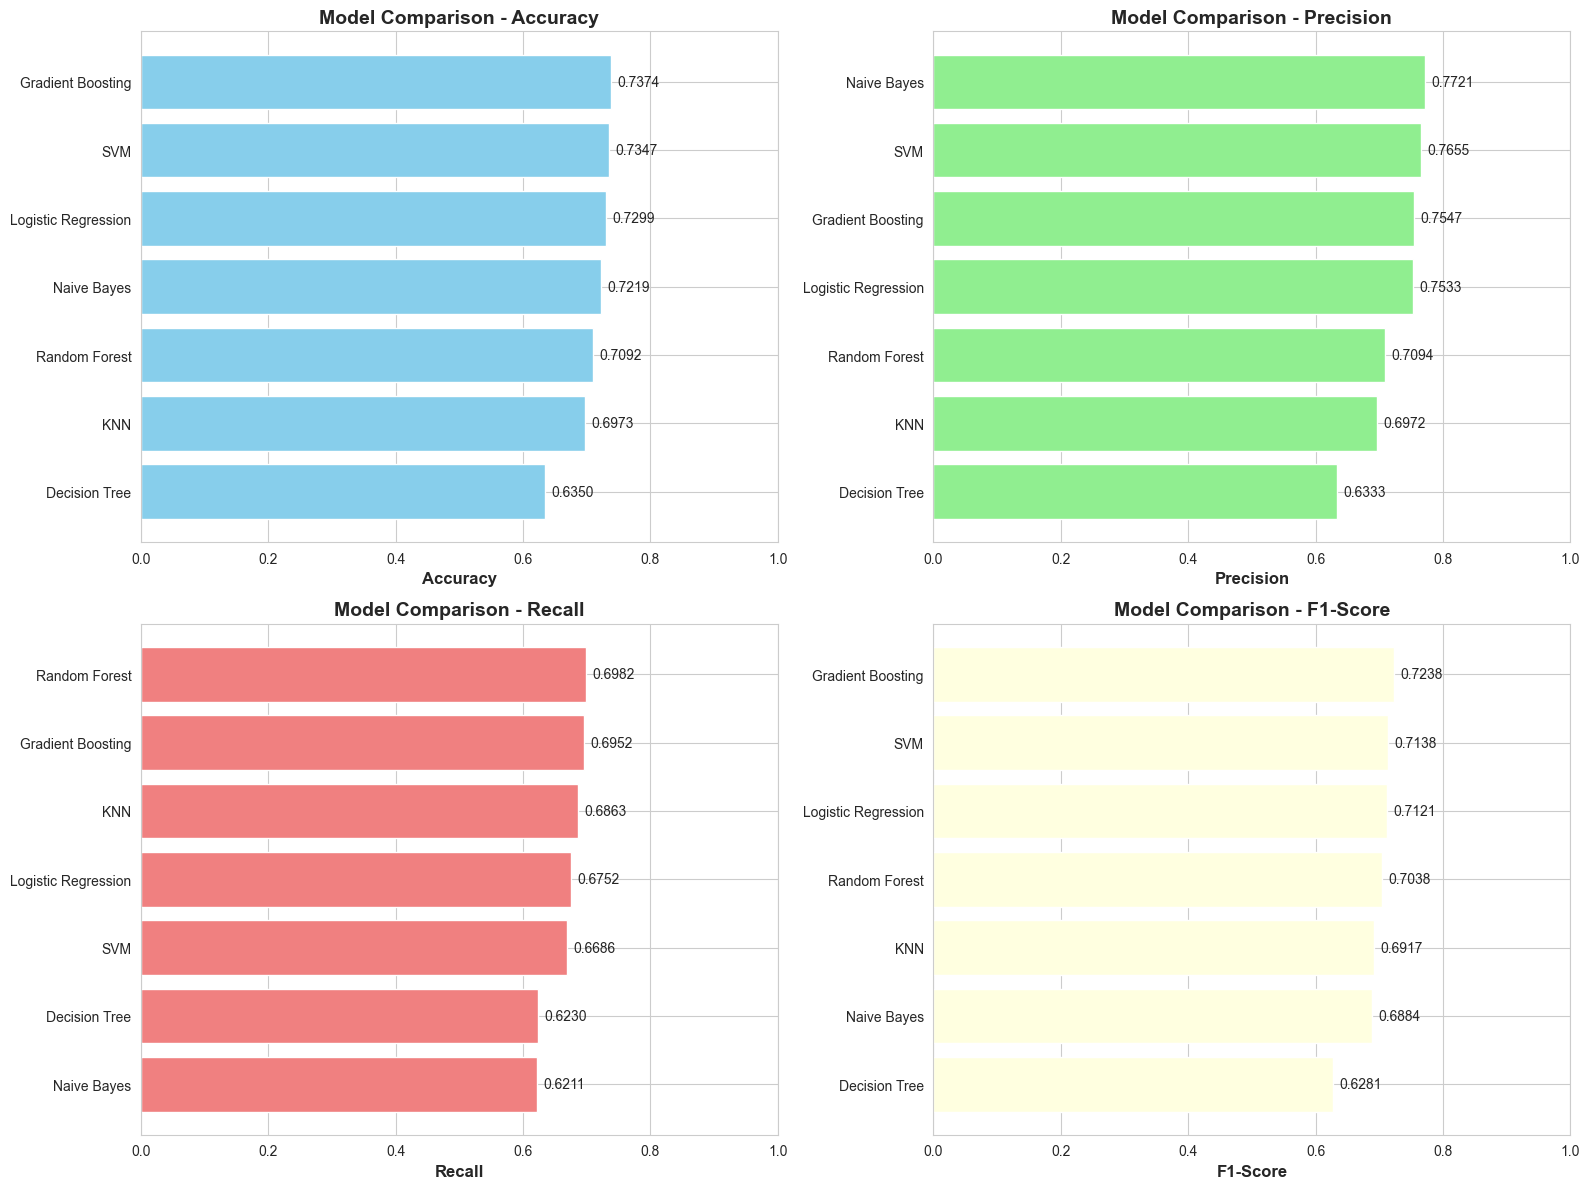


 Best Model: Gradient Boosting
 Best Accuracy: 0.7374


In [9]:
# ============================================
#            MODEL EVALUATION
# ============================================

print("="*50)
print("MODEL EVALUATION")
print("="*50)

# 9.1: Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1-Score': [results[model]['f1_score'] for model in results]
})

# Sort by accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# 9.2: Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    comparison_df_sorted = comparison_df.sort_values(metric, ascending=True)
    ax.barh(comparison_df_sorted['Model'], comparison_df_sorted[metric], color=color)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Model Comparison - {metric}', fontsize=14, fontweight='bold')
    ax.set_xlim([0, 1])
    
    # Add value labels
    for i, v in enumerate(comparison_df_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.savefig('../visualizations/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 9.3: Best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print(f"\n Best Model: {best_model_name}")
print(f" Best Accuracy: {best_accuracy:.4f}")


DETAILED EVALUATION - Gradient Boosting

 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.72      0.78      0.75      6903
     Disease       0.75      0.70      0.72      6759

    accuracy                           0.74     13662
   macro avg       0.74      0.74      0.74     13662
weighted avg       0.74      0.74      0.74     13662



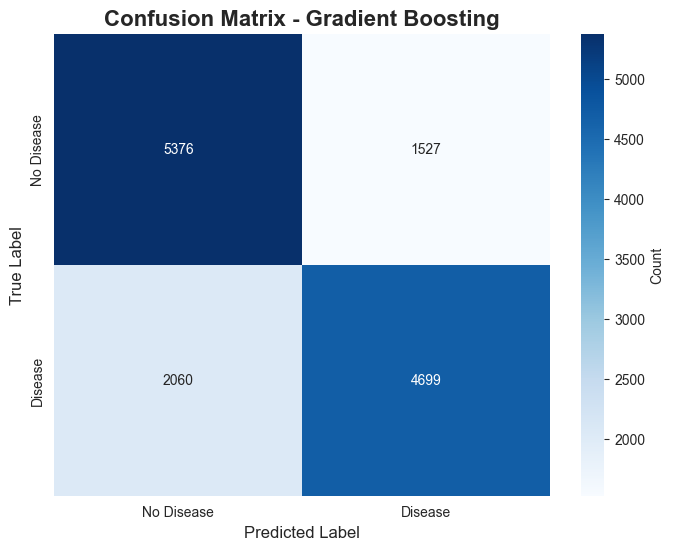


 Confusion Matrix:
True Negatives: 5376
False Positives: 1527
False Negatives: 2060
True Positives: 4699


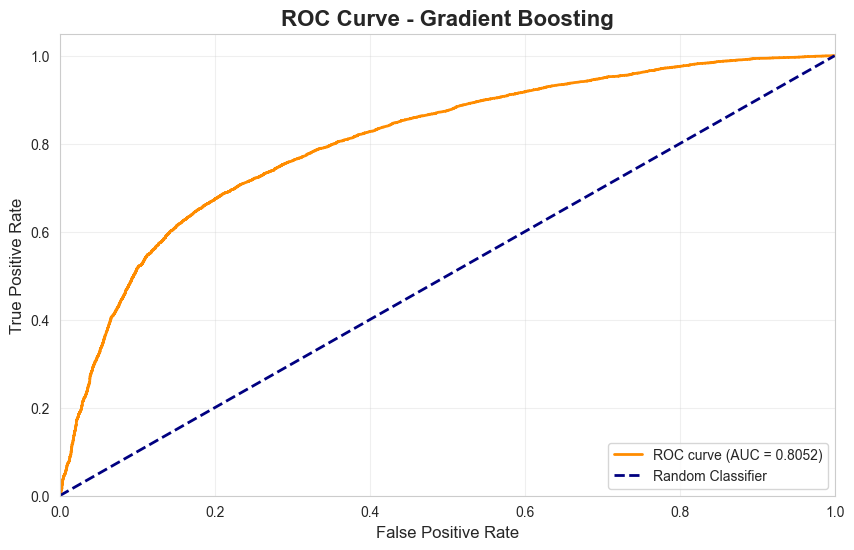


 ROC-AUC Score: 0.8052


In [10]:
# ============================================
#    DETAILED EVALUATION OF BEST MODEL
# ============================================

print("="*50)
print(f"DETAILED EVALUATION - {best_model_name}")
print("="*50)

# Get predictions from best model
y_pred_best = results[best_model_name]['predictions']
y_pred_proba_best = results[best_model_name]['probabilities']

# 10.1: Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No Disease', 'Disease']))

# 10.2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.savefig('../visualizations/confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Confusion Matrix:")
print(f"True Negatives: {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives: {cm[1, 1]}")

# 10.3: ROC Curve
if y_pred_proba_best is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
    roc_auc = roc_auc_score(y_test, y_pred_proba_best)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {best_model_name}', fontsize=16, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.savefig('../visualizations/roc_curve_best_model.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n ROC-AUC Score: {roc_auc:.4f}")


FEATURE IMPORTANCE ANALYSIS

 Feature Importance:
       Feature  Importance
         ap_hi    0.684016
     age_years    0.125647
   cholesterol    0.077084
           map    0.070199
           bmi    0.016272
        weight    0.008710
        active    0.004941
        height    0.003489
          gluc    0.003321
          alco    0.002154
         smoke    0.001622
pulse_pressure    0.001123
         ap_lo    0.000860
        gender    0.000561


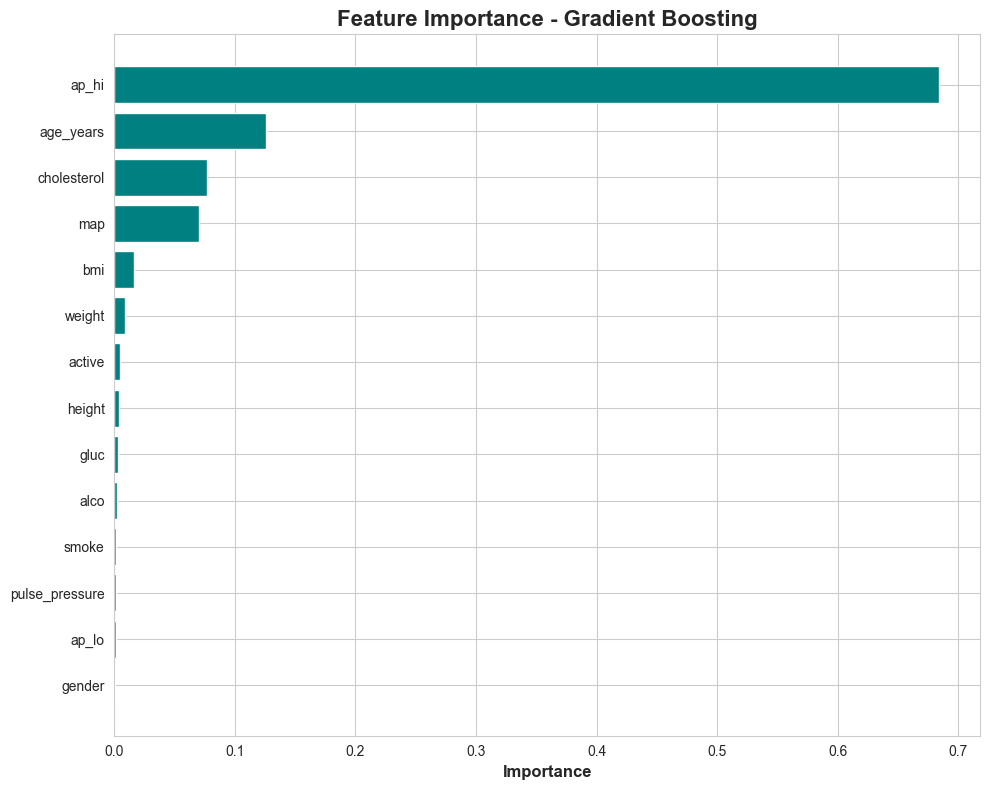

In [12]:
# ============================================
#  FEATURE IMPORTANCE (for tree-based models)
# ============================================

if hasattr(best_model, 'feature_importances_'):
    print("="*50)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*50)
    
    # Get feature importances
    importances = best_model.feature_importances_
    feature_names = X.columns
    
    # Create DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("\n Feature Importance:")
    print(feature_importance_df.to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.title(f'Feature Importance - {best_model_name}', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../visualizations/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()


In [13]:
# ============================================
#         SAVING THE BEST MODEL
# ============================================

print("="*50)
print("SAVING THE BEST MODEL")
print("="*50)

# Save the model
model_filename = f'../models/best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"\n Best model saved to: {model_filename}")
print(f"   Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f}")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'accuracy': best_accuracy,
    'features': X.columns.tolist(),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

metadata_filename = '../models/model_metadata.pkl'
with open(metadata_filename, 'wb') as f:
    pickle.dump(metadata, f)

print(f" Model metadata saved to: {metadata_filename}")


SAVING THE BEST MODEL

 Best model saved to: ../models/best_model_gradient_boosting.pkl
   Model: Gradient Boosting
   Accuracy: 0.7374
 Model metadata saved to: ../models/model_metadata.pkl


In [15]:
# ============================================
#      CREATING PREDICTION FUNCTION
# ============================================

print("="*50)
print("CREATING PREDICTION FUNCTION")
print("="*50)

def predict_heart_disease(age_years, gender, height, weight, ap_hi, ap_lo, 
                         cholesterol, gluc, smoke, alco, active):
    """
    Predict heart disease risk
    
    Parameters:
    - age_years: Age in years
    - gender: 1=Female, 2=Male
    - height: Height in cm
    - weight: Weight in kg
    - ap_hi: Systolic blood pressure
    - ap_lo: Diastolic blood pressure
    - cholesterol: 1=normal, 2=above normal, 3=well above normal
    - gluc: 1=normal, 2=above normal, 3=well above normal
    - smoke: 0=no, 1=yes
    - alco: 0=no, 1=yes
    - active: 0=no, 1=yes
    
    Returns:
    - prediction: 0=No Disease, 1=Disease
    - probability: Probability of disease
    """
    
    # Calculate derived features
    bmi = weight / ((height / 100) ** 2)
    map_val = ((2 * ap_lo) + ap_hi) / 3
    pulse_pressure = ap_hi - ap_lo
    
    # Create input array (must match training feature order)
    input_data = np.array([[gender, height, weight, ap_hi, ap_lo, cholesterol, 
                           gluc, smoke, alco, active, age_years, bmi, 
                           map_val, pulse_pressure]])
    
    # Scale the input
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = best_model.predict(input_scaled)[0]
    
    if hasattr(best_model, 'predict_proba'):
        probability = best_model.predict_proba(input_scaled)[0][1]
    else:
        probability = None
    
    return prediction, probability

# Test the function
print("\n Testing prediction function with sample data:")
sample_prediction, sample_prob = predict_heart_disease(
    age_years=55, gender=2, height=170, weight=80, 
    ap_hi=130, ap_lo=85, cholesterol=2, gluc=1, 
    smoke=0, alco=0, active=1
)

print(f" Sample Prediction: {'Disease' if sample_prediction == 1 else 'No Disease'}")
if sample_prob is not None:
    print(f" Disease Probability: {sample_prob:.2%}")


CREATING PREDICTION FUNCTION

 Testing prediction function with sample data:
 Sample Prediction: Disease
 Disease Probability: 63.19%


In [16]:
# ============================================
#            FINAL SUMMARY
# ============================================

print("\n" + "="*50)
print("PROJECT SUMMARY")
print("="*50)

summary = f"""
 PROJECT COMPLETED SUCCESSFULLY!

 Dataset Information:
   - Original records: {df.shape[0]:,}
   - Cleaned records: {df_cleaned.shape[0]:,}
   - Features used: {X.shape[1]}
   - Train samples: {X_train.shape[0]:,}
   - Test samples: {X_test.shape[0]:,}

 Best Model Performance:
   - Model: {best_model_name}
   - Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)
   - Precision: {results[best_model_name]['precision']:.4f}
   - Recall: {results[best_model_name]['recall']:.4f}
   - F1-Score: {results[best_model_name]['f1_score']:.4f}

 Files Created:
   - Model: {model_filename}
   - Scaler: ../models/scaler.pkl
   - Metadata: ../models/model_metadata.pkl
   - Visualizations: 8+ plots saved in ../visualizations/


"""

print(summary)

# Save summary to file
with open('../PROJECT_SUMMARY.txt', 'w') as f:
    f.write(summary)

print(" Summary saved to PROJECT_SUMMARY.txt")
print("\n HEART DISEASE PREDICTION PROJECT COMPLETED!!! ")



PROJECT SUMMARY

 PROJECT COMPLETED SUCCESSFULLY!

 Dataset Information:
   - Original records: 70,000
   - Cleaned records: 68,310
   - Features used: 14
   - Train samples: 54,648
   - Test samples: 13,662

 Best Model Performance:
   - Model: Gradient Boosting
   - Accuracy: 0.7374 (73.74%)
   - Precision: 0.7547
   - Recall: 0.6952
   - F1-Score: 0.7238

 Files Created:
   - Model: ../models/best_model_gradient_boosting.pkl
   - Scaler: ../models/scaler.pkl
   - Metadata: ../models/model_metadata.pkl
   - Visualizations: 8+ plots saved in ../visualizations/



 Summary saved to PROJECT_SUMMARY.txt

 HEART DISEASE PREDICTION PROJECT COMPLETED!!! 
